In [ ]:
# Plot the verification against reanalysis data:
# Plot 2-D maps of bias and rmse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)
plt.rcParams['figure.figsize'] = [12, 6]

In [ ]:
# Create a custom colormap
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, 'blue'), (0.45, 'white'),(0.55, 'white'), (1, 'red')]
tmap = LinearSegmentedColormap.from_list('custom_colormap', colors)


In [85]:
datahome  = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/GribDiag/ush/plotgribnc/data/gribnc'
#reanal    = 'ERA5' # 'ERA5' or 'IFS'
reanal    = 'IFS' # 'ERA5' or 'IFS'

timerange = '2022062000_2022072800_12'
expids    = 'CTRL-ng_v0'
#expids    = 'old_ctrl-CTRL-CTRL_no_situ-ng_v0'
exptest   = 'CTRL'
pltlevs   = [100, 200, 500, 700, 850]
ncdir     = datahome+'/'+reanal+'/'+timerange+'/'+expids
print(ncdir)

/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/GribDiag/ush/plotgribnc/data/gribnc/IFS/2022062000_2022072800_12/CTRL-ng_v0


In [ ]:
# Read bias
f = nc.Dataset(f"{ncdir}/bias_{exptest}_f06.nc")
if reanal == 'ERA5':
    lat     = f.variables['latitude'][:]
    lon     = f.variables['longitude'][:]
    lev     = f.variables['level'][:]
    clwmr   = f.variables['clwmr'][:]
    q       = f.variables['q'][:]
    t       = f.variables['t'][:]
elif reanal == 'IFS':
    lat     = f.variables['latitude'][:]
    lon     = f.variables['longitude'][:]
    lev     = f.variables['level'][:]
    r       = f.variables['r'][:]
    t       = f.variables['t'][:]
    u       = f.variables['u'][:]    
    v       = f.variables['v'][:]    

In [87]:
# Read rmse
f = nc.Dataset(f"{ncdir}/rmse_{exptest}_f06.nc")
if reanal == 'ERA5':
    lat     = f.variables['latitude'][:]
    lon     = f.variables['longitude'][:]
    lev     = f.variables['level'][:]
    clwmr   = f.variables['clwmr'][:]
    q       = f.variables['q'][:]
    t       = f.variables['t'][:]
elif reanal == 'IFS':
    lat     = f.variables['latitude'][:]
    lon     = f.variables['longitude'][:]
    lev     = f.variables['level'][:]
    r       = f.variables['r'][:]
    t       = f.variables['t'][:]
    u       = f.variables['u'][:]    
    v       = f.variables['v'][:]   

In [ ]:
# For ERA5:
    

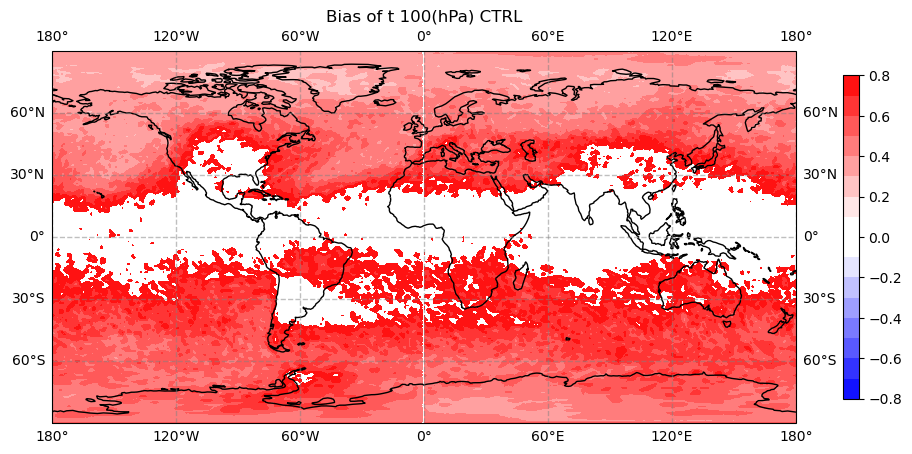

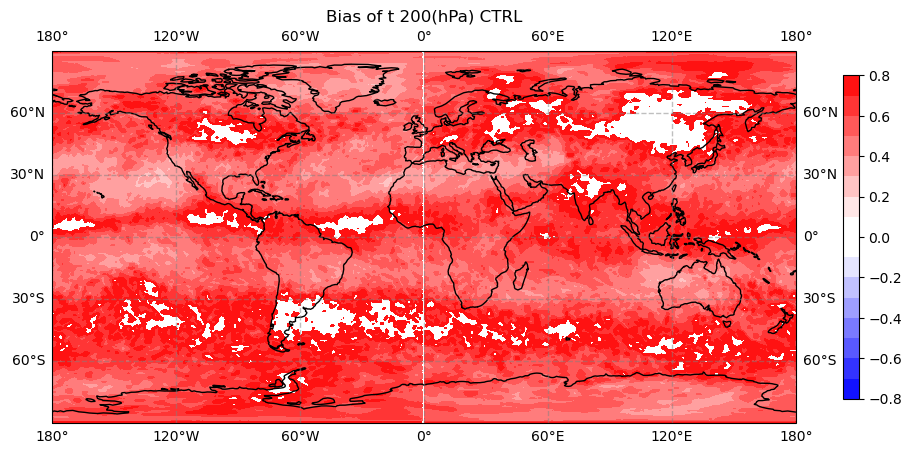

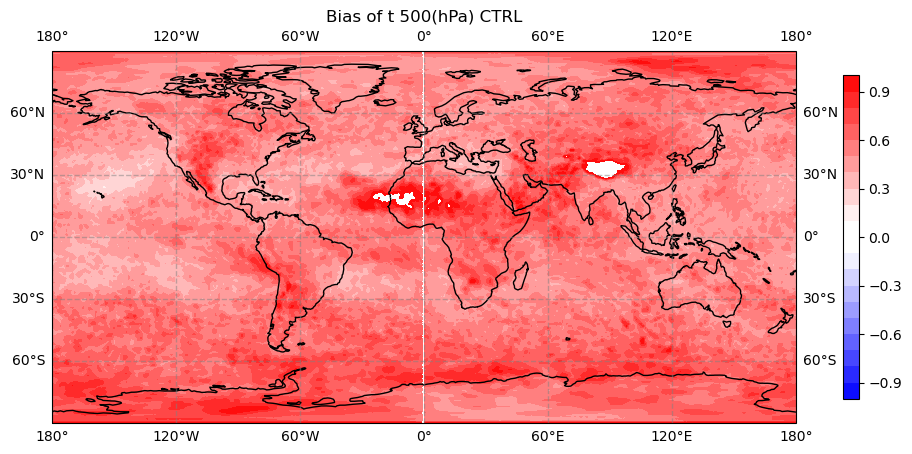

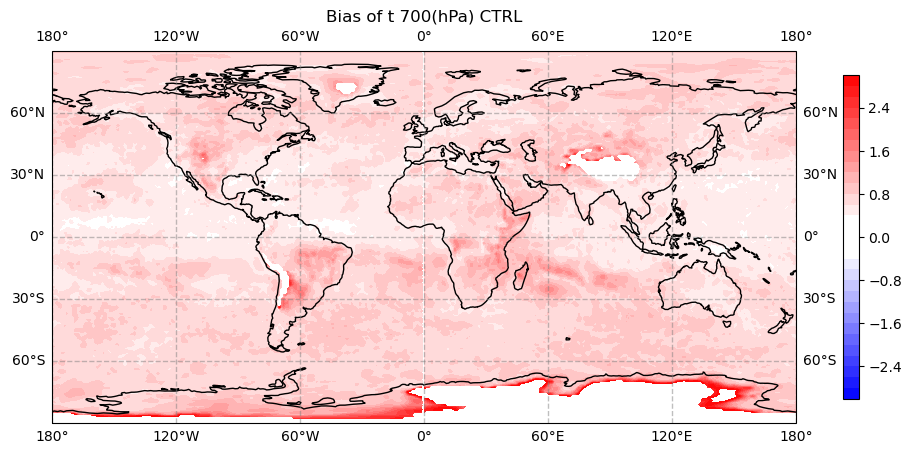

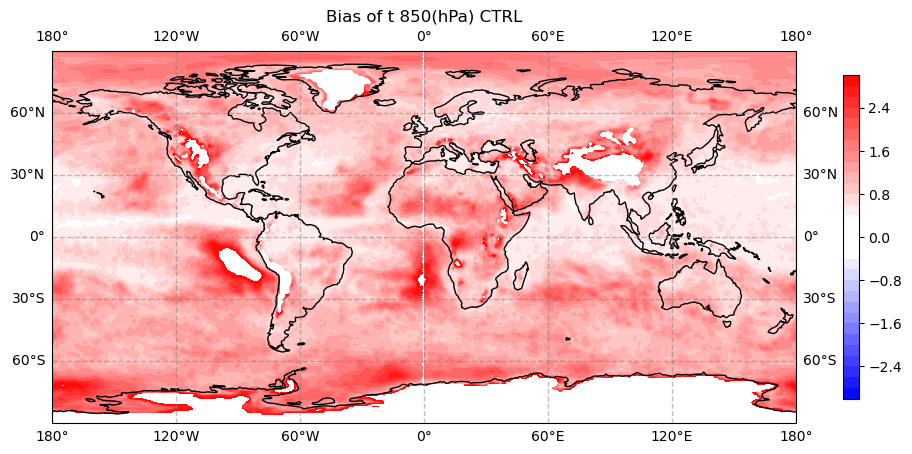

In [88]:
# for IFS:
if reanal == 'IFS':
    
    for plotz in pltlevs:
        # temperature
        zz = np.where(lev == plotz)
        pltvar = t[zz[0][0],:,:].transpose()
        
        if plotz < 500:
            dlevs = 0.1
            dmax  = 0.8
        elif plotz == 500:
            dlevs = 0.1
            dmax  = 1.0
        elif plotz in (700, 850, 925, 1000):
            dlevs = 0.2
            dmax  = 3.0
            
        plt_levs= np.arange(-dmax,dmax+dlevs,dlevs)
        
        lats, lons = np.meshgrid(lat, lon)
        
        fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
        ax.coastlines()
        contour=ax.contourf(lons, lats, pltvar, cmap=tmap, levels=plt_levs, vmin=-dmax, vmax=dmax)    
        plt.colorbar(contour, ax=ax, shrink=0.7)  # Add colorbar to show the scale
        ax.set_xlabel('longitude')
        ax.set_ylabel('latitude') 
        ax.set_title(f'Bias of t {plotz}(hPa) {exptest}')
        ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
        plt.show()
    


In [ ]:
print(r[3,:,:].transpose().shape)
print(np.max(t[3,:,:]))

In [ ]:
print(f_drmse.variables.keys())   # get all variables names


In [83]:
print(lev)

[  10   20   50  100  150  200  250  300  400  500  700  850  925 1000]


In [ ]:
zz = np.where(lev==500)
print(lev[zz])